<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
#ваш код здесь

data = pd.read_csv('C:/Users/User/Desktop/data_code/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
#ваш код здесь
data.head(3)
data.shape

(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
#ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [6]:
#ваш код здесь

data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
#ваш код здесь
def education(args):
    str_ = args.split(' ')[:3]
    str_ = ' '.join(str_)
    if "Высшее" in str_:
        return "высшее"
    elif "Неоконченное высшее" in str_:
        return "неоконченное высшее"
    elif "Среднее специальное" in str_:
        return "среднее специальное"
    elif "Среднее образование" in str_:
        return "среднее"
data['Образование'] = data['Образование и ВУЗ'].apply(education)
data = data.drop('Образование и ВУЗ', axis=1)

display(f"{data['Образование'].value_counts()['среднее']} соискателей со средним уровнем образования")

'559 соискателей со средним уровнем образования'

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
#ваш код здесь
def get_gender(args):
    args = (args.split(',')[0]).strip()
    if args == 'Мужчина':
        return 'М'
    elif args == 'Женщина':
        return 'Ж'
    else:
        return None
def get_age(args):
    args = (args.split(',')[1]).strip()
    args = args.split(' ')
    return int(args[0])
data['Пол'] = data['Пол, возраст'].apply(get_gender)
data['Возраст'] = data['Пол, возраст'].apply(get_age)
display(data['Пол'].value_counts(normalize=True))
display(data['Возраст'].mean())
    

Пол
М    0.809293
Ж    0.190707
Name: proportion, dtype: float64

32.19674146254246

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
#ваш код здесь

# избавляемся от пустых значений
def zeros(args):
    if (args == '') or (args == 'Не указано'):
        return np.nan
    else:
        return args
    
data['Опыт работы'] = data['Опыт работы'].apply(zeros)

# функция приобразует строку и получает количество месяцев трудового стажа
def months_of_experience(args):
    args = (str(args).split(' '))
    if len(args) < 3:
        return np.nan
    elif args[5] in ['месяц', 'месяца', 'месяцев']:
        return int((int(args[2])*12 + int(args[4])))
    elif args[3] in ['месяц', 'месяца', 'месяцев']:
        return int(args[2])
    else:
        return int(int(args[2])*12)

data['Опыт работы (месяц)'] = data['Опыт работы'].apply(months_of_experience)
data = data.drop('Опыт работы', axis=1)
display(data['Опыт работы (месяц)'].median())

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
                  'Казань', 'Челябинск', 'Омск', 'Самара', 
                  'Ростов-на-Дону', 'Уфа', 'Красноярск',
                  'Пермь', 'Воронеж', 'Волгоград' ]
# функция для преобразования городов в категории
def get_city(args):
    args = args.split(' ')[0]
    if args in ['Москва', 'Санкт-Петербург']:
        return args
    elif args in million_cities:
        return 'город-миллионник'
    else:
        return "другие"
data['Город'] = data['Город, переезд, командировки'].apply(get_city)

# готов ли соискатель к командировкам (преобразование строки)    
def trip_readiness(arg):
    if 'командировка' in arg:
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else:
            return True
    else:
        return False
    
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(trip_readiness)   

# готов ли соискатель к переезду (преобразование строки) 
def relocation_readiness(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(relocation_readiness)   

# Рассчитываем процент людей, готовых и к переезду, и к командировкам
mask_trip = data['Готовность к командировкам'] == True
mask_relocation = data['Готовность к переезду'] == True
x_trip_relocation = data[mask_trip & mask_relocation]['Город, переезд, командировки'].count()
y_total = data['Город, переезд, командировки'].count()
func_trip_relocation = (x_trip_relocation/y_total)*100

display(func_trip_relocation)

data = data.drop('Город, переезд, командировки', axis=1)


31.86572501340962

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
#ваш код здесь
data.head()
employment = ["полная занятость", "частичная занятость", "проектная работа", "стажировка", "волонтерство"]
work_schedule = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]
for emp in employment:
    data[emp] = data['Занятость'].apply(lambda x: True if emp in x else False)
for schedule in work_schedule:
    data[schedule] = data['График'].apply(lambda x: True if schedule in x else False)

display(data[(data['проектная работа'] == True) & (data['волонтерство'] == True)].shape[0])
display(data[(data['вахтовый метод'] == True) & (data['гибкий график'] == True)].shape[0])

data = data.drop(['Занятость', 'График'], axis=1)

436

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
#ваш код здесь
rates = pd.read_csv('C:/Users/User/Desktop/data_code/ExchangeRates.csv', sep=',')

# переводим в формат даты
rates['date'] = pd.to_datetime(rates['date']).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date

# display(rates, data)
# выделяем сумму и валюту ЗП
data['salary val'] = data['ЗП'].apply(lambda x: float(x.split(' ')[0]))
data['salary currency'] = data['ЗП'].apply(lambda x: x.split(' ')[1])

# задаем dataframe для преобразований
currency = ['грн.', 'USD', 'EUR', 'бел.руб.', 'KGS', 'сум', 'AZN', 'KZT', 'руб.']
currency_ISO = ['UAH', 'USD', 'EUR', 'BYN', 'KGS', 'UZS', 'AZN', 'KZT', 'руб.']
currency_proportion = [10, 1, 1, 1, 10, 10000, 1, 100, 1]
df_ISO = pd.DataFrame({'Currency': currency, 'ISO': currency_ISO, 'Proportion': currency_proportion})

# подтягиваем данные в исходную таблицу
merged_data = data.merge(df_ISO, left_on='salary currency', right_on='Currency', how='left')
# merged_data['Обновление резюме'] = pd.to_datetime(merged_data['Обновление резюме'])
merged_data = merged_data.merge(rates, left_on=['Обновление резюме', 'ISO'], right_on=['date', 'currency'], how='left')

# форматируем данные
merged_data['salary val'] = merged_data['salary val'].astype('float')
merged_data["close"] =  merged_data["close"].fillna(value=1)
merged_data["proportion"] = merged_data["proportion"].fillna(value=1)

# переводим ЗП в рубли
merged_data['ЗП (руб)'] = merged_data['salary val']*merged_data['close']/merged_data['proportion']
merged_data = merged_data.drop(['ЗП', 'ISO', 'Proportion','currency', 'per', 'date', 
                                'time', 'close', 'vol', 'proportion', 'Currency', 
                                'salary currency', 'salary val'], axis=1)
display(merged_data['ЗП (руб)'].median())


C:\Users\User\AppData\Local\Temp\ipykernel_7964\3101007172.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rates['date'] = pd.to_datetime(rates['date']).dt.date
C:\Users\User\AppData\Local\Temp\ipykernel_7964\3101007172.py:6: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date


59000.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64

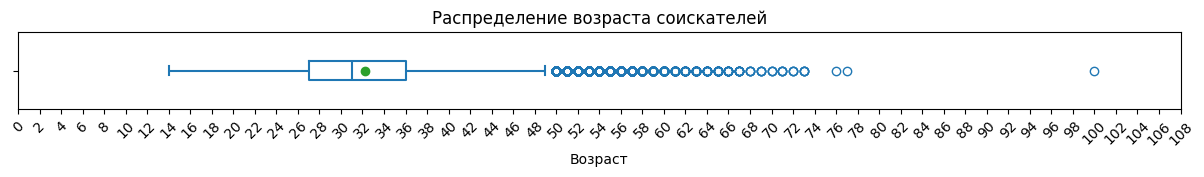

In [13]:
# ваш код здесь
import plotly.express as px
fig = plt.figure(figsize=(15,1))
boxplot = sns.boxplot(
    data = merged_data,
    x='Возраст',
    orient='h',
    fill=False,
    gap=0.7,
    showmeans=True,
    meanprops={'marker': 'o'},
    
)
boxplot.set_title('Распределение возраста соискателей')
boxplot.set_xticks(range(110)[::2])
boxplot.xaxis.set_tick_params(rotation=45);
merged_data['Возраст'].mode()



ваши выводы по графику здесь

Мода распределения - 30 лет

Предельные значения - 14 и 49 лет. При этом большинство соискателей имеют возраст 27-36 лет (медиана 31 год).

В категорию аномалий относятся все значения больше 49 лет (не укладываются в 1.5 межквартильного размаха)

Для стат анализа или построения модели можно исключить возраст от 58 для женщин и 63 для мужчин (выход на пенсию), либо создать новую категорию как "пенсионеры"

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [30]:
# ваш код здесь
fig = px.histogram(
    data_frame=merged_data,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы в месяцах',
    histnorm='percent',
    width=1000,
    marginal='box'
)
fig.show()
display(merged_data["Опыт работы (месяц)"].mode())
display(merged_data["Опыт работы (месяц)"].max())

0    81.0
Name: Опыт работы (месяц), dtype: float64

1188.0

<img src = './images/Опыт работы (месяц).png'>

ваши выводы здесь

Мода распределения - 81 месяц

Предельные значения 0 и 300 месяцев. Большинство соискателей имеют опыт работы от 60 до 150 месяцев (медиана 100 мес.)

Большое количество выбросов начинается от 300 мес, из которых явно выбивается около 6 значений от 570 месяцев.

Основной пул соискателей - молодые люди, которые "ищут себя", в том время как видно что люди постарше не так активно "мониторят" рынок

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


0    50000.0
Name: ЗП (руб), dtype: float64

(5, 25)

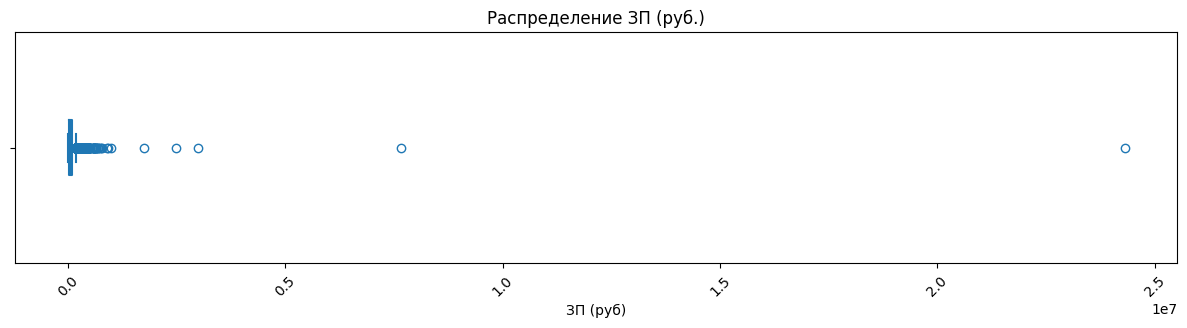

In [15]:
# ваш код здесь
# группируем зарплаты, чтобы проанализировать паттерн
def buckets(args):
    if args < 20000:
        return '0-20000'
    elif args >= 20000 and args <=50000:
        return '20000-50000'
    elif args > 50000 and args <80000:
        return '50000-80000'
    elif args >= 80000 and args <120000:
        return '80000-120000'
    elif args >= 120000 and args <200000:
        return '120000-200000'
    else: 
        return '> 200000'
merged_copy = merged_data.copy()
merged_copy['salary_range'] = merged_copy['ЗП (руб)'].apply(buckets)

fig = px.histogram(
    data_frame = merged_copy,
    x='salary_range',
    width=1000,
    height=300,
    text_auto=True,
    nbins=100,
    title='Распределение ЗП (руб)',
    labels={'salary_range': 'Диапазон зарплат', 'count': 'Количество соискателей'}
);
fig.update_xaxes(categoryorder = 'array', categoryarray = ['0-20000','20000-50000', '50000-80000', '80000-120000','120000-200000', '> 200000'])
fig.show()

fig = plt.figure(figsize=(15,3))
boxplot = sns.boxplot(
    data = merged_copy,
    x='ЗП (руб)',
    orient='h',
    fill=False,
    gap=0.7,    
)
boxplot.set_title('Распределение ЗП (руб.)')
boxplot.xaxis.set_tick_params(rotation=45);

display(merged_copy["ЗП (руб)"].mode())
display(merged_copy[merged_copy['ЗП (руб)'] > 1000000].shape)



<img src = './images/Распределение ЗП.png'>

ваши выводы здесь

Мода ЗП - 50 000 руб.
Зарплаты разнятся от 1(не указано) до 24 млн, при этом большиснтво зарплат в диапазоне от 20 до 50 тыс.руб.

Если посмотреть на коробчатую диаграмму, то можно увидеть несколько сильно выделяющихся значений.

При построении модели от них скорее всего нужно будет либо избавиться, либо учитывать меньшую значимость для всех данных

Такое распределение зарплат корреллирует с фактом, что в основном соискатели - молодые


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [16]:
# ваш код здесь

merged_4 = merged_data[merged_data['ЗП (руб)'] < 1000000]
merged_4 = merged_4.groupby(by='Образование', as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=merged_4,
    x='Образование',
    y='ЗП (руб)',
    text_auto=True,
    title='Зависимость медианной зарплаты от уровня образования соискателя'
);
fig.show()


<img src = './images/медианная зп и уровень образования.png'>

ваши выводы здесь

Наибольшая медианная ЗП - соискатели с образованием "высшее"

Наименьшая медианная ЗП - соискатели с образованием "среднее и среднее специальное"

По диаграмме видно, что уровень ЗП и уровень образования напрямую коррелируют, поэтому это важно учесть при прогнозировании

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [17]:
# ваш код здесь
merged_5 = merged_data[merged_data['ЗП (руб)'] < 1000000]
merged_5 = merged_5.groupby(by='Город', as_index=False)['ЗП (руб)'].mean()
fig = px.bar(
    data_frame=merged_5,
    x='Город',
    y='ЗП (руб)',
    text_auto=True,
    title='Распределение средней зарплаты по городам'
);
fig.show()
merged_max_city = merged_data[merged_data['ЗП (руб)'] < 1000000].groupby(by='Город')['ЗП (руб)'].max()
display(merged_max_city)

Город
Москва              900000.0
Санкт-Петербург     645171.0
город-миллионник    511681.6
другие              923983.0
Name: ЗП (руб), dtype: float64

<img src = './images/средняя зарплата по городам.png'>

ваши выводы здесь

Самая большая средняя (желаемая) ЗП приходится на Москву и Санкт-Петербург.
При этом уровни зарплат в остальных городах в целом на одном уровне (это удивляет, т.к. ожидание, что ЗП в городе-миллионнике должна быть выше)

Здесь видна прямая корреляция размера города (Москва, Спб) и уровня ЗП, поэтому стоит учитывать признак города при прогнозировании.

При этом, возможна дополнительная группировка на Москву, Санкт-Петербург и остальные города, чтобы оптимизировать объем данных

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [18]:
# ваш код здесь
merged_6 = (merged_data.copy()).groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=merged_6,
    x = 'Готовность к переезду',
    y = 'ЗП (руб)',
    barmode='group',
    color='Готовность к командировкам',
    orientation='v',
    text_auto=True,
    title='Медианная ЗП по готовности к переезду/командировкам'
);
fig.show()

display(merged_6[(merged_6['Готовность к переезду'] == True) & (merged_6['Готовность к командировкам'] == True)]['ЗП (руб)'])



3    65924.25
Name: ЗП (руб), dtype: float64

<img src = './images/зп по переездам.png'>

ваши выводы здесь

По диаграмме видно, что более высокие зарплатные ожидание у людей, которые готовы и к переездам, и к командировкам

то есть у тех, кто готов вложить большое количество усилий.

Это релевантно и для тех, кто не готов переезжать, но жертвовать личным временем в командировках

И ситуация ровно наоборот, если соискатель не хочет/не готов к таким активностям

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

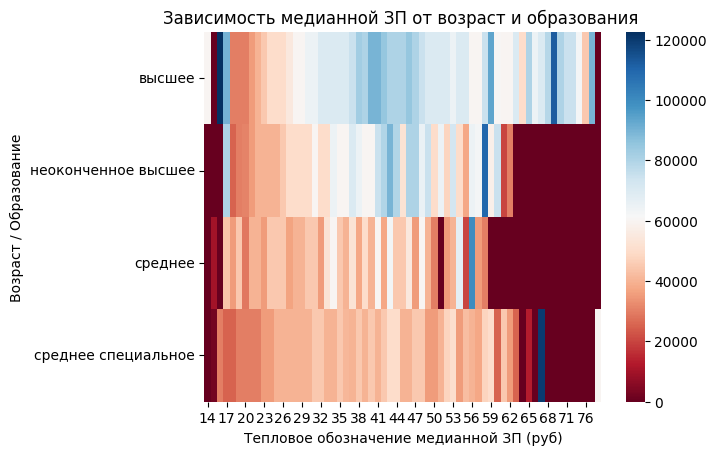

In [19]:
# ваш код здесь
merged_7 = merged_data.copy()
merged_7_pivot = merged_7.pivot_table(
    values = 'ЗП (руб)', 
    columns = 'Возраст', 
    index = 'Образование', 
    aggfunc = 'median',
    fill_value=0)

heatmap = sns.heatmap(
    data=merged_7_pivot,
    cmap='RdBu',
)
heatmap.set_title('Зависимость медианной ЗП от возраст и образования ')
heatmap.set_ylabel('Возраст / Образование')
heatmap.set_xlabel('Тепловое обозначение медианной ЗП (руб)');

ваши выводы здесь

По карте видно, что наименьшие ожидания по ЗП у людей, не имеющих высшего образования.

Также наблюдается увеличение ЗП по мере увеличения возраста соискателей. 

Наибольшие ожидания у людей в возрасте от ~ 40 до 47 лет и в районе 65-70 лет с высшим образованием.

Карта отражает действительность, т.к. более квалифицированная работа оплачивается больше

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

(7, 25)


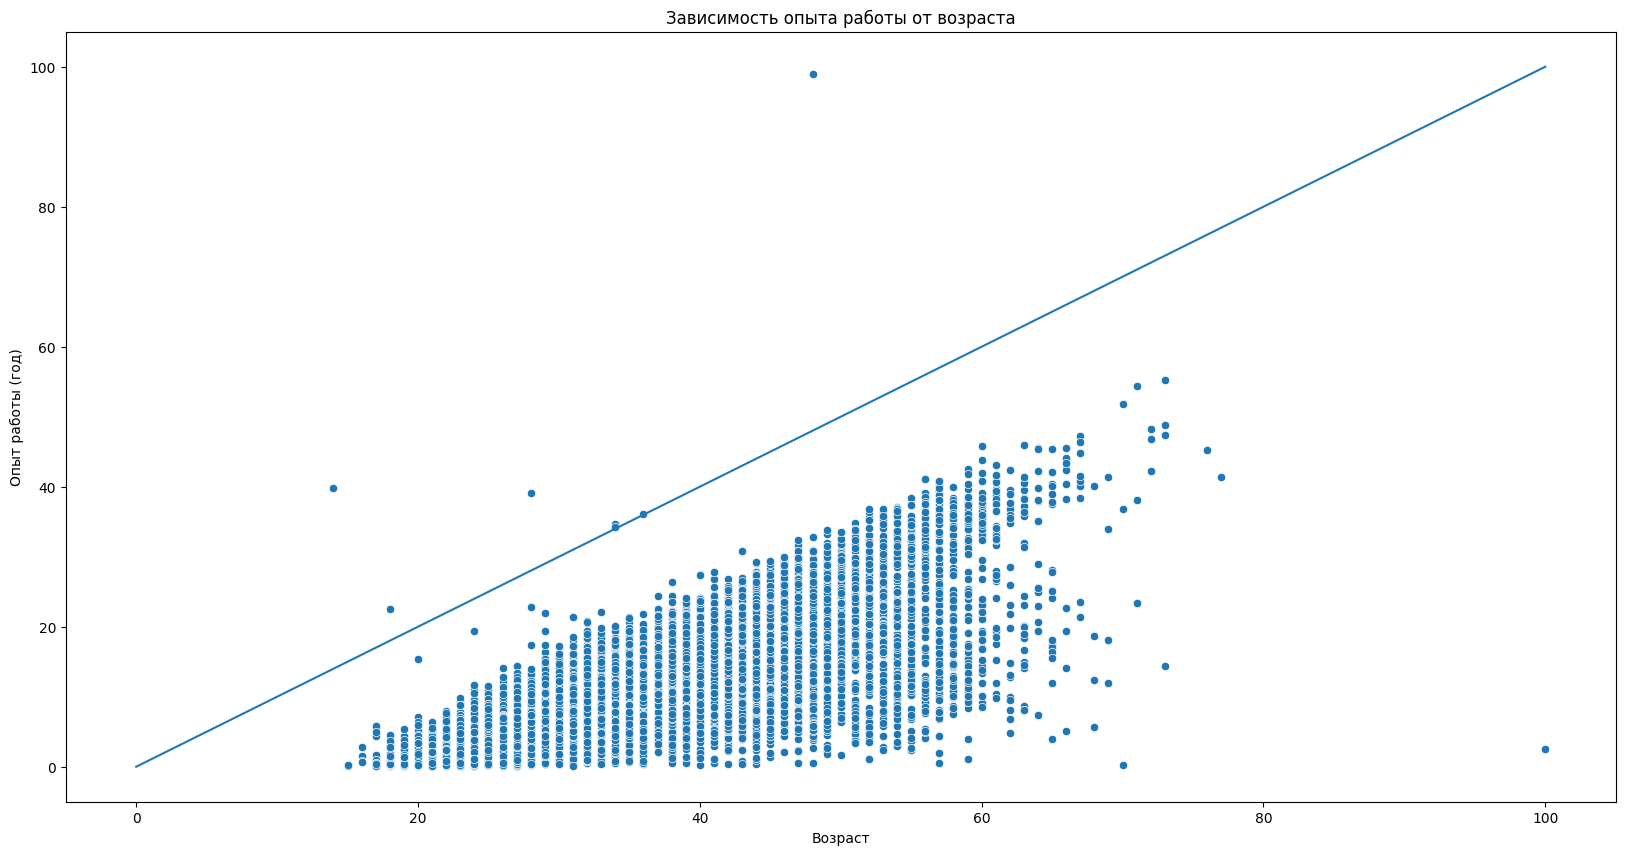

In [20]:
# ваш код здесь

merged_8 = merged_data.copy()

merged_8['Опыт работы (год)'] = merged_8['Опыт работы (месяц)']/12

fig = plt.figure(figsize=(20,10))
sns.lineplot(x=[0,100], y=[0,100])
ax = sns.scatterplot(
    data=merged_8,
    x='Возраст',
    y='Опыт работы (год)'
)
ax.set_title('Зависимость опыта работы от возраста');
print(merged_8[merged_8['Опыт работы (год)'] >= merged_8['Возраст']].shape)

ваши выводы здесь

Есть 7 точек (резюме) с опытом работы выше, чем возраст - аномалия, которую нужно исправить, либо убрать из выборки

Распределение - нормальное (как и должно быть в реальности)

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


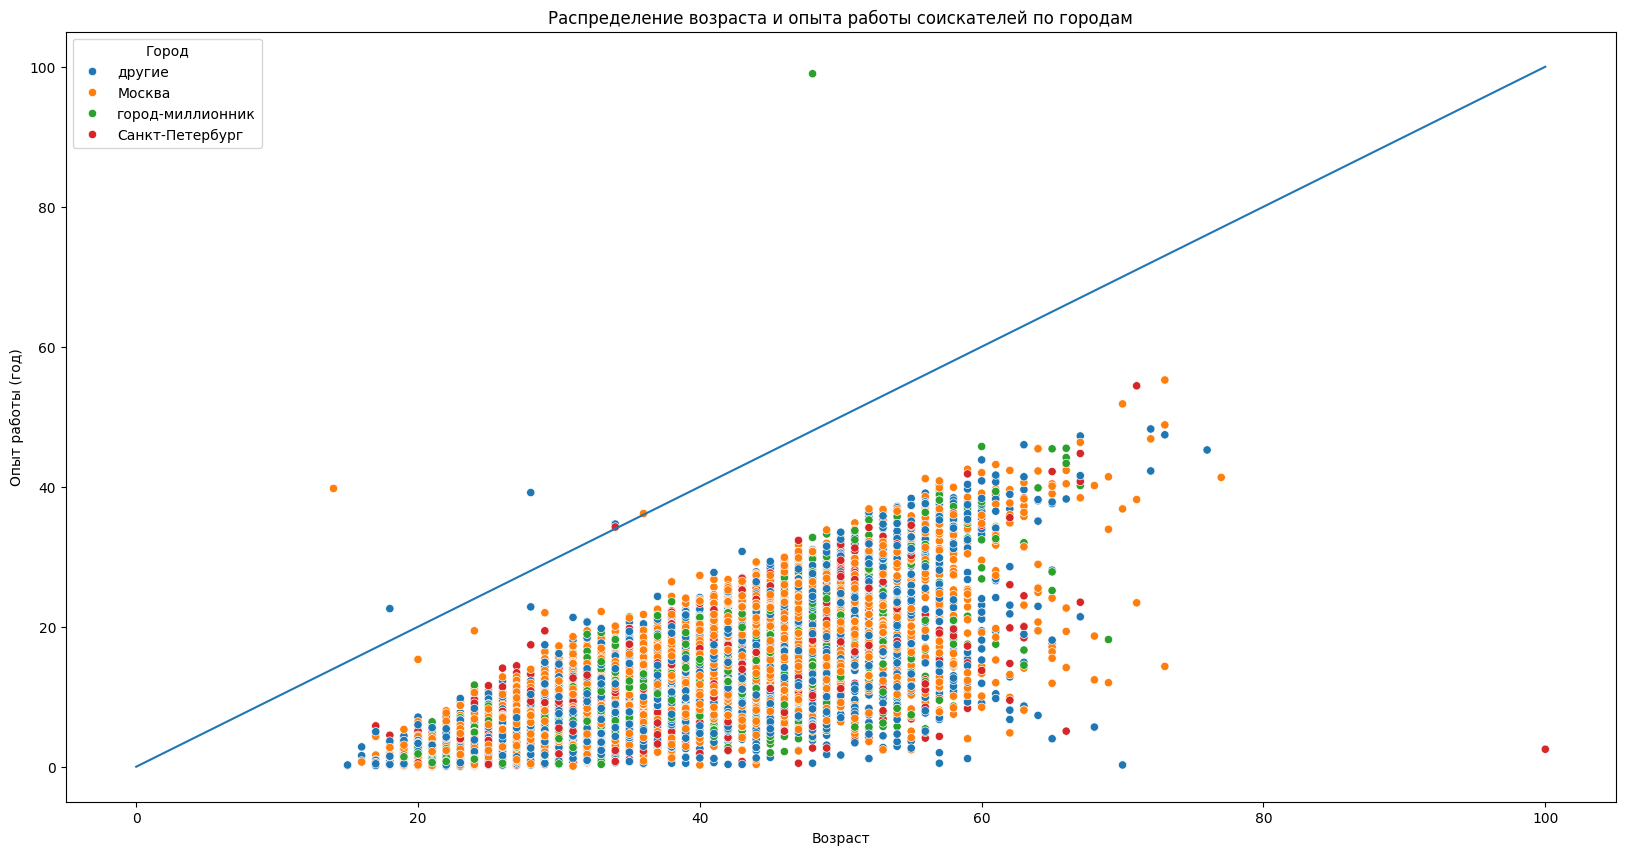

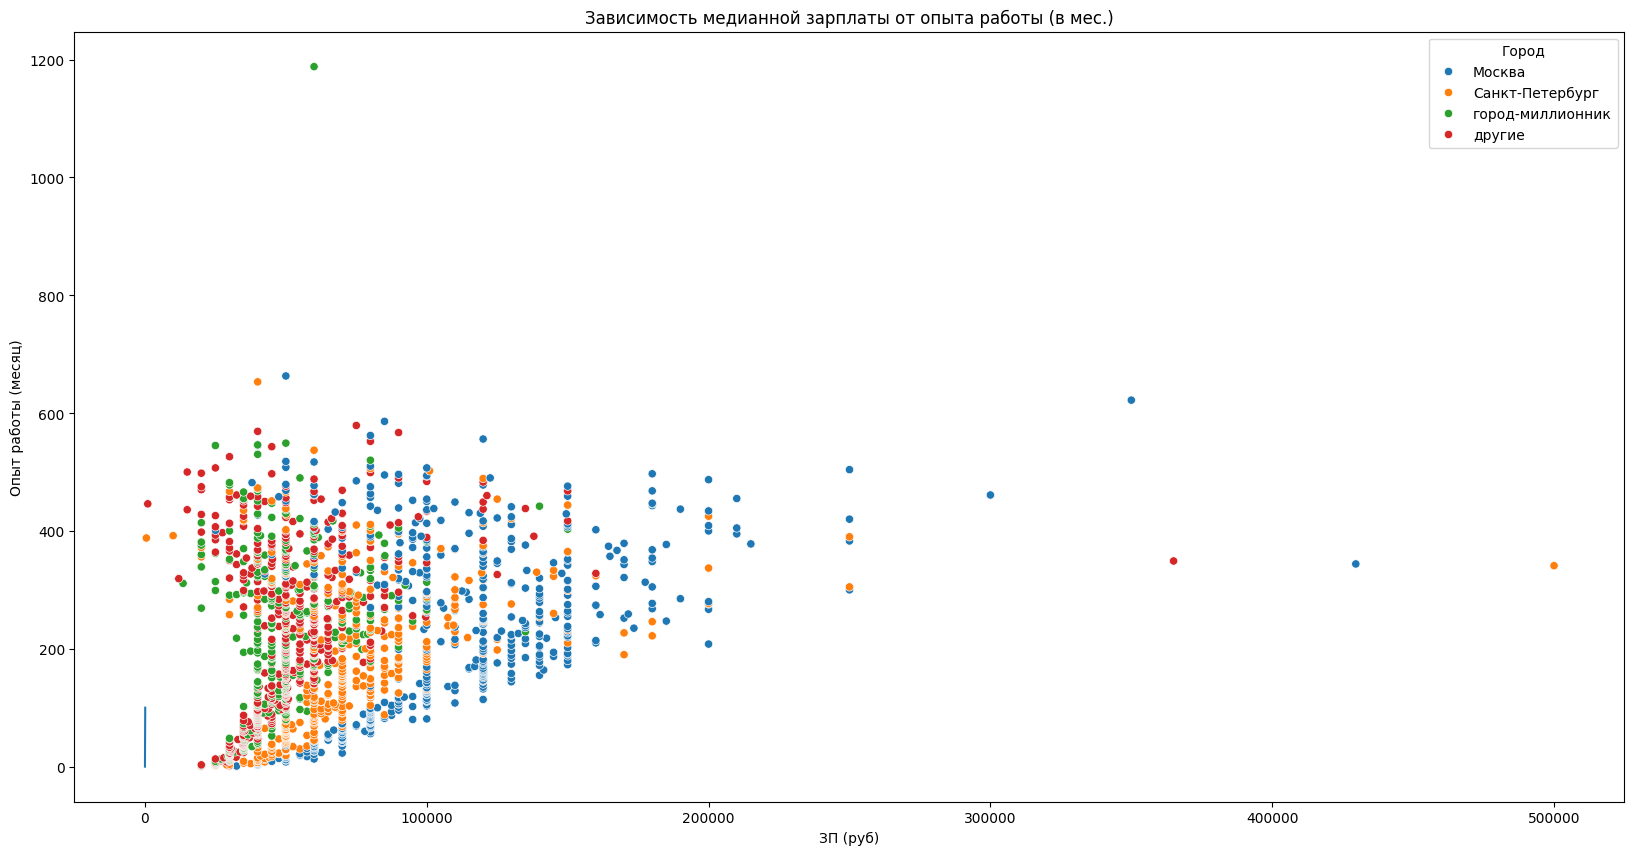

In [21]:
# ваш код здесь

merged_9 = merged_data.copy()
merged_9['Опыт работы (год)'] = merged_9['Опыт работы (месяц)']/12
fig = plt.figure(figsize=(20,10))
sns.lineplot(x=[0,100], y=[0,100])
ax = sns.scatterplot(
    data=merged_9,
    x='Возраст',
    y='Опыт работы (год)',
    hue='Город'
)
ax.set_title('Распределение возраста и опыта работы соискателей по городам');

merged_10 = merged_data.copy().groupby(by=['Опыт работы (месяц)', 'Город'], as_index=False)['ЗП (руб)'].median()

fig = plt.figure(figsize=(20,10))
sns.lineplot(x=[0,100], y=[0,100])
ax = sns.scatterplot(
    data=merged_10,
    x='ЗП (руб)',
    y='Опыт работы (месяц)',
    hue='Город'
)
ax.set_title('Зависимость медианной зарплаты от опыта работы (в мес.)');

ваши выводы здесь

#### Распределение возраста и опыта работы соискателей по городам

На первый взгляд сразу видно, что преобладающее количество резюме находится в Москве и на втором стоит категория "другие города"

Можно отметить, что соискатели из "других" городов ищут работу раньше всех, в то время как из Питера - позже всех (~ от 25лет)

Выбросы в разрезе городов в целом одинаковы, тяжело выделить только один "подпризнак"

#### Зависимость медианной зарплаты от опыта работы (в мес.)

Темпы роста зарплат в Москве и Питере сильно опережают остальные города по мере увеличения опыта работы соискателей.

Как пример, ЗП в Москве при опыте в 200 месяцев может обгонять ближайшего соседа в два раза

Стоит выделить определенный потолок зарплат в городах-миллионниках и "других" городов: соискатели в большинстве ищут работу с диапазоном зарплат 30-70 тыс.руб несмотря увеличения опыта работы (150-400 месяцев)

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
# ваш код здесь
clean_data = merged_data.copy()

display(clean_data[clean_data.duplicated() == True].shape)

clean_data = clean_data.drop_duplicates()


(161, 24)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
# ваш код здесь

clean_data['Опыт работы (месяц)'].isnull().sum()

168

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
# ваш код здесь

clean_data = clean_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], axis=0)
clean_data['Опыт работы (месяц)'] = clean_data['Опыт работы (месяц)'].fillna(clean_data['Опыт работы (месяц)'].median())

display(clean_data['Опыт работы (месяц)'].mean())

114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
# ваш код здесь
outliers = clean_data[(clean_data['ЗП (руб)'] < 1000) | (clean_data['ЗП (руб)'] > 1000000)]
display(outliers.shape)

clean_data = clean_data.drop(outliers.index, axis=0)

(89, 24)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
# ваш код здесь

outliers_age = clean_data[clean_data['Опыт работы (месяц)']/12 >= clean_data['Возраст']]
display(outliers_age.shape)

clean_data = clean_data.drop(outliers_age.index, axis=0)

(7, 24)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

'3 - количество выбросов'

'[15, 15, 100] - возраст, попавший под выброс'

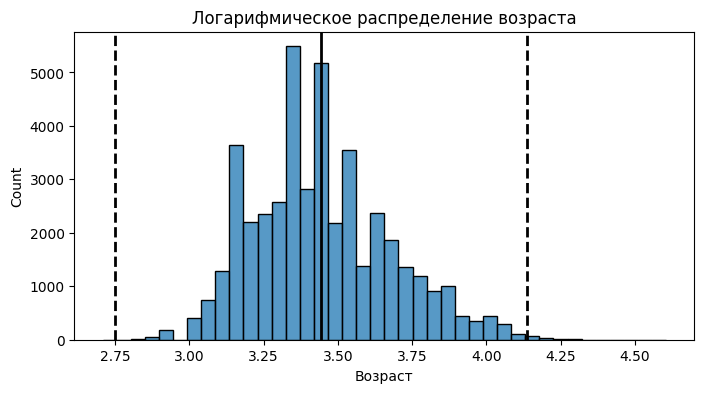

In [27]:
# ваш код здесь

def outliers_z_score_mod(
    data, feature, log_scale=True, left=3, right=4): # сделали послабление правой границы количества сигм
    x = np.log(data[feature])
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu-left*sigma
    upper_bound = mu+right*sigma
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>=lower_bound) & (x<=upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(clean_data, 'Возраст', log_scale=True)
display(f'{outliers.shape[0]} - количество выбросов')
display(f'{outliers["Возраст"].to_list()} - возраст, попавший под выброс')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(clean_data['Возраст'])
histplot = sns.histplot(log_age, bins=40, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Логарифмическое распределение возраста');

ваш коммментарий здесь

Выявлено 3 выброса с возрастом 15 и 100 лет.

Логарифмическое распределение смещено влево. Прежде мы уже находили медианное значение (~30 лет), поэтому левая ассиметричность это подтверждает